# Question 1: KNN Regression 

### 1.) Drop the dteday variable and then define your feature space and the target variable. Split the data into test (20%) and train set (80%)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state = 1000

In [3]:
df = pd.read_csv("/Users/felipeacosta/Documents/GitHub/Machine_Learning-USU/HW_data/HW7/bikeshare.csv")

In [4]:
df.head()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday,cnt
0,1,0,1,0,0,6,1,1,-1.334609,0.947345,-1.553844,2011-01-01,16
1,1,0,1,1,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,40
2,1,0,1,2,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,32
3,1,0,1,3,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,13
4,1,0,1,4,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,1


In [5]:
df.describe()

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,1.737900e+04,1.737900e+04,1.737900e+04,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.317279,1.425283,1.255429e-16,-3.753926e-18,-9.090171e-16,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,1.000000e+00,1.000000e+00,1.000000e+00,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-2.477133e+00,-3.251072e+00,-1.553844e+00,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,-8.152801e-01,-7.631212e-01,-6.996685e-01,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,0.000000,1.000000,1.564651e-02,1.436357e-02,3.189788e-02,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,8.465731e-01,7.918483e-01,5.198813e-01,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,2.612292e+00,1.932159e+00,5.399715e+00,977.000000


In [6]:
for col in ['season', 'yr', 'mnth','hr','holiday','weekday','notbizday','weathersit']:
    df[col]= df[col].astype("category")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
season        17379 non-null category
yr            17379 non-null category
mnth          17379 non-null category
hr            17379 non-null category
holiday       17379 non-null category
weekday       17379 non-null category
notbizday     17379 non-null category
weathersit    17379 non-null category
temp          17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
dteday        17379 non-null object
cnt           17379 non-null int64
dtypes: category(8), float64(3), int64(1), object(1)
memory usage: 817.0+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,17379.0,1.255429e-16,1.000000,-2.477133,-0.815280,0.015647,0.846573,2.612292
hum,17379.0,-3.753926e-18,1.000000,-3.251072,-0.763121,0.014364,0.791848,1.932159
windspeed,17379.0,-9.090171e-16,1.000000,-1.553844,-0.699669,0.031898,0.519881,5.399715
cnt,17379.0,1.894631e+02,181.387599,1.000000,40.000000,142.000000,281.000000,977.000000


In [9]:
df2=df.drop(columns=["dteday"])
df2= pd.get_dummies(df2, drop_first=True)

### Defining the variables and splitting the data

In [10]:
y = df2['cnt']
X = df2.drop('cnt', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [11]:
X_train.head()

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,notbizday_1,weathersit_2,weathersit_3,weathersit_4
2136,-0.399817,-0.970450,0.276298,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
5466,1.573634,-0.866786,0.031898,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
8770,-1.438475,0.532687,-0.699669,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
14674,0.327244,1.310171,0.519881,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
15708,0.119512,-1.229612,0.519881,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


#### Part 2

In [12]:
from sklearn.neighbors import KNeighborsRegressor

In [13]:
# Train all the model with the default features. 

KNN_regression = KNeighborsRegressor()
KNN_regression.fit(X_train, y_train)

KNeighborsRegressor()

Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance

In [14]:
# Make predictions on the test set and save them as y_hat 
y_hat = KNN_regression.predict(X_test)

In [15]:
# Construct a data frame named df_predictions with 2 columns. y_test, and y_hat  from previous part
predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.head()

,y_test,y_hat
4495,26,47.0
4418,47,90.4
7141,11,25.2
14765,205,184.8
16541,65,68.0


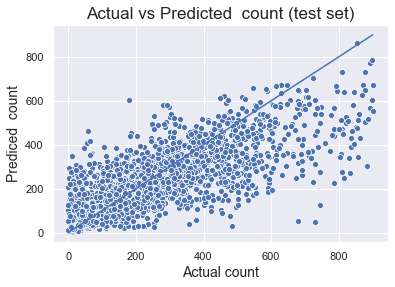

In [16]:
# Visualize actual vs predicted counts in the test set using an scatterplot. Are you visually satisfied with the regression model?
sns.scatterplot(x=y_test, y=y_hat)
sns.lineplot(y_test, y_test)

plt.xlabel('Actual count', fontsize=14)
plt.ylabel('Prediced  count', fontsize=14)
plt.title('Actual vs Predicted  count (test set)', fontsize=17)
plt.show()

The regression is predicting a steeper slope. It looks like the residual value increase as the predicted value is higher. We are not satisfied with the model and thats why we will run cross validation in the following parts. 

In [17]:
KNN_regression.score(X_train, y_train)

0.7817289093491862

In [18]:
KNN_regression.score(X_test, y_test)

0.6563477713147379

The R squared of the test set is pretty high, but the one from the training set is higher. We can try to improve the model with cross validation

----

In [19]:
# Report the RMSE_test for the KNN regression model.
MSE_test = round(np.mean(np.square(y_test - y_hat)),2)
MSE_test

11777.26

In [20]:
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

108.52

In [21]:
# Cross Validation
# Estimate the RMSE_test by doing a 5 fold cross validation on the train set and name it as RMSE_CV. 
from sklearn.model_selection import cross_val_score

In [22]:
NMSE = cross_val_score(estimator = KNN_regression, X = X_train, y = y_train, cv = 5 , scoring="neg_mean_squared_error" )

In [23]:
MSE_CV = round(np.mean(-NMSE),4)
MSE_CV

12084.1291

In [24]:
RMSE_CV = round(np.sqrt(MSE_CV), 4)
RMSE_CV

109.9278

In [25]:
## Choosing K
 
## Let's plot the RMSE_CV and RMSE_test vs K. 

In [26]:
RMSE_CV=[]
RMSE_test = []

k=40

for i in range(1,k):
    KNN_i = KNeighborsRegressor(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    RMSE_i = np.sqrt(np.mean(-1*cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 10 , scoring="neg_mean_squared_error" )))
    RMSE_CV.append(RMSE_i)
    
    RMSE_test.append(np.sqrt(np.mean(np.square(y_test - KNN_i.predict(X_test)))))
    
optimal_k = pd.DataFrame({'RMSE_CV': np.round(RMSE_CV,2), 'RMSE_test':np.round(RMSE_test,2), 'K':range(1,k)})

In [27]:
optimal_k.head(10)

,RMSE_CV,RMSE_test,K
0,125.55,120.24,1
1,111.91,109.09,2
2,108.21,108.80,3
3,106.73,108.19,4
4,107.32,108.52,5
5,107.59,109.37,6
6,108.06,109.72,7
7,108.33,110.29,8
8,108.38,110.61,9
9,108.59,110.59,10


In [28]:
np.argmin(optimal_k['RMSE_CV'])

3

In [29]:
optimal_k.loc[np.argmin(optimal_k['RMSE_CV']), 'K']

4

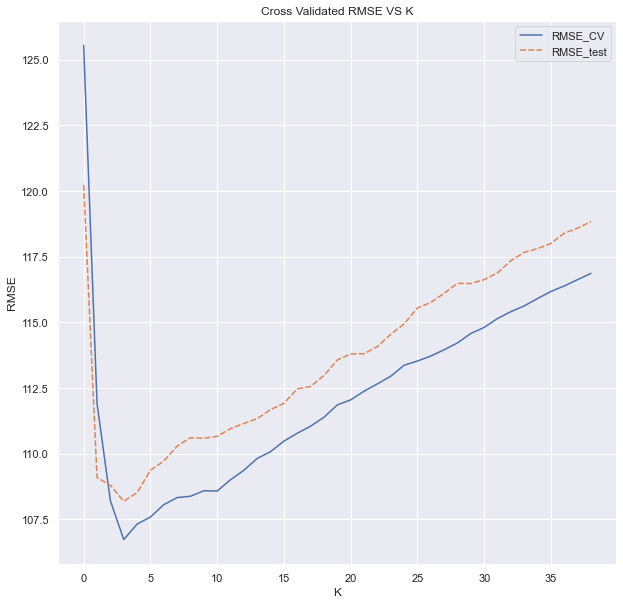

In [30]:
plt.figure(figsize=(10,10))
sns.lineplot(data=optimal_k.drop('K', axis=1))
plt.title('Cross Validated RMSE VS K')
plt.xlabel('K')
plt.ylabel('RMSE')
plt.show()

By looking at the blue line we can see the optimal k for this model is a number between 0 and 5. By using the function argmin, we can see that the optimal k is 4.


## Question 2: KNN Regression 

In [31]:
# Define a binary target variable overload. 
df2['Overload'] = np.where(df['cnt']> 500, 1, 0)
df2.head()


,temp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,...,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,notbizday_1,weathersit_2,weathersit_3,weathersit_4,Overload
0,-1.334609,0.947345,-1.553844,16,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
1,-1.438475,0.895513,-1.553844,40,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,-1.438475,0.895513,-1.553844,32,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,-1.334609,0.636351,-1.553844,13,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,-1.334609,0.636351,-1.553844,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [32]:
# first we look at target variable proportions:
pd.crosstab(df2['Overload'],df2['Overload'], normalize='all')*100

Overload,0,1
Overload,,
0,92.640543,0.000000
1,0.000000,7.359457


The data is clearly imbalanced. 

In [33]:
y = df2['Overload']
X = df2.drop(['cnt','Overload'], axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

In [34]:
X_train.head()

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,notbizday_1,weathersit_2,weathersit_3,weathersit_4
2136,-0.399817,-0.970450,0.276298,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
5466,1.573634,-0.866786,0.031898,0,1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
8770,-1.438475,0.532687,-0.699669,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
14674,0.327244,1.310171,0.519881,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
15708,0.119512,-1.229612,0.519881,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [35]:
# From sklearn.neighbors import the relevant function for KNN classification.
from sklearn.neighbors import KNeighborsClassifier

In [36]:
# Train the KNN classification model using its default parameters.

KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train, y_train)

KNeighborsClassifier()

Minkowski distance: https://en.wikipedia.org/wiki/Minkowski_distance

In [37]:
# Generate the predicted probabilities and predicted classifications and save them as y_hat_probs, y_hat respectively
y_hat      = KNN_classifier.predict(X_test)
y_hat_probs = KNN_classifier.predict_proba(X_test)[:,1] 


In [38]:
np.max(y_hat_probs)


1.0

In [39]:
np.min(y_hat_probs)

0.0

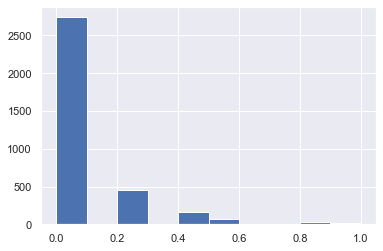

In [40]:
#Plot the histogram of y_hat_probs
plt.hist(y_hat_probs)
plt.show()

Most of the probabilities are closer to 0, this is given that the data is highly imbalanced and most of the observation show a bike ride count lower than 500.
The max value for the probabilities is 1 and the min value is 0. Therefore, non threshold would create either all positive or negative predictions.

In [41]:
# Generate predicted classifications for two different thresholds (30% and 70% threshold)
y_hat_30 = np.where(y_hat_probs>0.3,1,0)
y_hat_70 = np.where(y_hat_probs>0.7,1,0)

The lowest the threshold the less false negatives the model will predict. This is because even though the porbability of success (high overload) is low, the model will predict a success (high overload)

In [42]:
# Construct a data frame named df_predictions with 5 columns. y_test,  and the 4 y_hats from previous parts 
df_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_probs':y_hat_probs,
                               'y_hat_30':y_hat_30, 'y_hat_70':y_hat_70})
df_predictions.head()

,y_test,y_hat_probs,y_hat_30,y_hat_70
4495,0,0.0,0,0
4418,0,0.0,0,0
7141,0,0.0,0,0
14765,0,0.0,0,0
16541,0,0.0,0,0


In [43]:
# Borrowing the KKN report:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef



def my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5, weights='uniform'):
    knn= KNeighborsClassifier(n_neighbors=K, weights=weights)
    knn.fit(X_train, y_train)
    probs = knn.predict_proba(X_test)[:,1]
    y_hat = np.where(probs>=threshold,1,0)
    
    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    MCC = round(matthews_corrcoef(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negative ','Actual : positive'], columns=['Predict : negative','Predict :positive '])
    
    print("-----------------------------------------")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print('MCC       = {}'.format(MCC))
    print("-----------------------------------------")
    return cm_labled
 

In [44]:
my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5, weights='uniform')

-----------------------------------------
Accuracy  = 0.9485
Error_rate  = 0.0515
Precision = 0.86
Recall    = 0.38
f1_score  = 0.53
MCC       = 0.55
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,3196,17
Actual : positive,162,101


The accuracy of the model is high, however, given that the data is imbalanced we should use accuracy and error rate as measure of performance. Precision and recall are better measurements of performance. The model has a high precision which means that it does well predicting success that actually belong to the success class. However, the models has low recall this is becuase the number of false negatives are high given the relatively high threslhold of 50% which does not fit an imbalanced dataset. The f1 score is greater than 50% which would classify it as a decent model.
The MCC is greater than 0 which means that the model is better than a random prediction.

In [45]:
my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.3, weights='uniform')

-----------------------------------------
Accuracy  = 0.937
Error_rate  = 0.063
Precision = 0.58
Recall    = 0.61
f1_score  = 0.59
MCC       = 0.56
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,3097,116
Actual : positive,103,160


By lowering the threslhold, the accuracy worsened; however, we have a more balanced precision and recall metrics. The precision dropped given that the model predicted more positives given the lower threslhold whcih increased the false positives (denominator of the formula), the recall metric improved given that the number of false negatives dropped significantly 162 to 103.
The f1 score improved since we have a more balanced model. The MCC is also greater than 0 for this model and higher than when the threslhold was .5; therefore, we can say that this is a better model.

No Skill: ROC AUC=0.500
KNN: ROC AUC=0.883


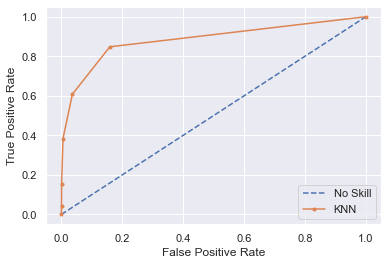

In [46]:
# Plot the ROC curve and report the AUC score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
ns_probs = [0 for i in range(len(y_test))]
lr_probs = KNN_classifier.predict_proba(X_test)[:,1]
# calculating scores for no skill and KNN 
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('KNN: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

The model is doing better than a random prediction since the area under the curve is greater than the no skill line.

##  Cross validation

In KNN, we use cross validation to find the optimal value of K. 

In [47]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics
#sorted(sklearn.metrics.SCORERS.keys())

In [48]:
# remember we saved our model in an object called "KNN_classifier"
accuracy = cross_val_score(estimator = KNN_classifier, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

In [49]:
1-accuracy

array([0.06112909, 0.0524991 , 0.05357785, 0.05395683, 0.05863309])

In [50]:
error_rate=round((1-accuracy).mean(),4)
error_rate

0.056

----------------

In [63]:
error_rate_test = []
error_rate_CV=[]
k=50

for i in range(1,k):
    KNN_i = KNeighborsClassifier(n_neighbors=i)
    KNN_i.fit(X_train, y_train)
    accuracy =  cross_val_score(estimator = KNN_i, X = X_train, y = y_train, cv = 5 , scoring="accuracy")
    error_rate_CV.append(np.mean(1-accuracy))
    error_rate_test.append(np.mean(y_test != KNN_i.predict(X_test)) )
    
optimal_k = pd.DataFrame({'error_rate_CV': error_rate_CV, 'error_rate_test':error_rate_test}, index=range(1,k))

In [64]:
optimal_k.head(10)

,error_rate_CV,error_rate_test
1,0.062217,0.059551
2,0.058189,0.058400
3,0.056103,0.052934
4,0.058045,0.057537
5,0.055959,0.051496
6,0.058836,0.060127
7,0.056463,0.054085
8,0.059556,0.062428
9,0.056247,0.059839
10,0.060419,0.062716


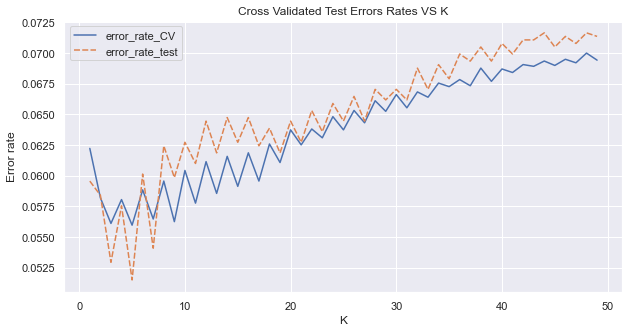

In [65]:
plt.figure(figsize=(10,5))
sns.lineplot(data=optimal_k)
plt.title('Cross Validated Test Errors Rates VS K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

It looks like the optimal K is 5, which was the default value for the KNN model.

In [66]:
my_KNN_report(X_train, y_train, X_test,y_test, K=5, threshold=0.5)

-----------------------------------------
Accuracy  = 0.9485
Error_rate  = 0.0515
Precision = 0.86
Recall    = 0.38
f1_score  = 0.53
MCC       = 0.55
-----------------------------------------


,Predict : negative,Predict :positive
Actual : negative,3196,17
Actual : positive,162,101


As the manager of Capital Bikeshare, you are dealing with a trade off between unexpected overload cost and cost of idle bikes. If the cost of a single idle bike is smaller than the cost of a single unexpected overload, then which of the following probability thresholds would satisfy your objective? 0.3, 0.5 or 0.7

This is similar to the pandemic example. The cost of False Negatives is greater than the False positives; therefore, it is better to have low threshold. In this case a .3 threshold would be applicable.